In [23]:
#importing the required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("Iris.csv")
print(iris)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [24]:
# data-points and features?
print (iris.shape)

(150, 6)


In [25]:
# column names in our dataset
print (iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [26]:
# How many data points for each class are present.
# How many flowers for each species are present.

iris["Species"].value_counts()
# balanced-dataset vs imbalanced datasets - this parameter shows if the data points are equally distributed or  not.
#Iris is a balanced dataset as the number of data points for every class is 50.

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

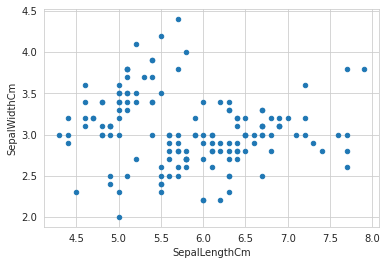

In [27]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


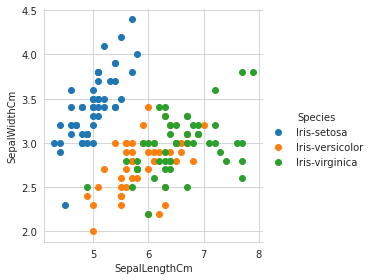

In [28]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

Visualizing the data using pandas’ andrew curves :
Andrews curves have the functional form:

f(t) = x_1/sqrt(2) + x_2 sin(t) + x_3 cos(t) +

x_4 sin(2t) + x_5 cos(2t) + …

Where x coefficients correspond to the values of each dimension and t is linearly spaced between -pi and +pi. Each row of the frame then corresponds to a single curve.

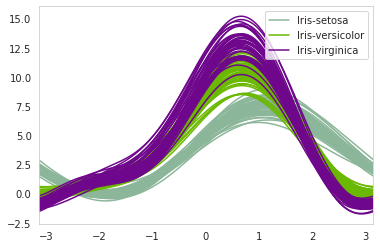

In [29]:
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")
plt.show()

**Observation(s):**

Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.

Seperating Versicolor from Viginica is much harder as they have considerable overlap.